# Statistics-7 (Analysis of Categorical Variables / Cardiovascular)

# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [38]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

⭐Run the following code to read in the "cardio.csv" file.

In [39]:
df = pd.read_csv("cardio.csv", sep=";")

In [40]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [42]:
df.shape

(70000, 13)

In [43]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

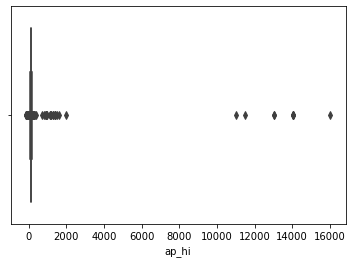

In [44]:
%matplotlib inline
sns.boxplot(x="ap_hi", data=df);

In [45]:
df = df[df["ap_hi"] < 250]
df = df[df["ap_hi"] > 0]

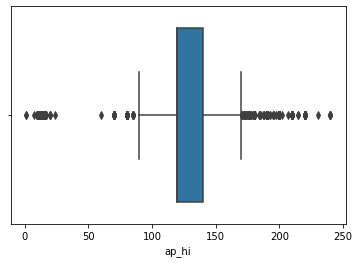

In [46]:
sns.boxplot(x="ap_hi", data=df);

In [47]:
iqr = stats.iqr(df.ap_hi)

In [48]:
np.percentile(df.ap_hi, 75) + 1.5*iqr

170.0

In [49]:
np.percentile(df.ap_hi, 25) - 1.5*iqr

90.0

In [50]:
df = df[df["ap_hi"] < 170]
df = df[df["ap_hi"] > 90]

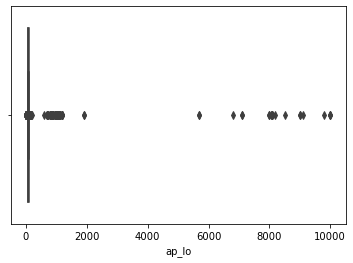

In [51]:
sns.boxplot(x="ap_lo", data=df);

In [52]:
df = df[df["ap_lo"] < 110]
df = df[df["ap_lo"] > 60]

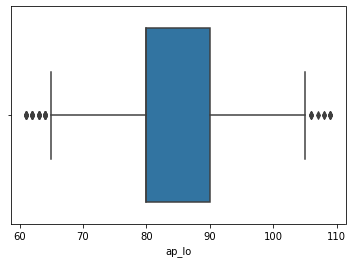

In [53]:
sns.boxplot(x="ap_lo", data=df);

In [54]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000,63834.000000
mean,49979.559451,19488.099508,1.351928,164.466256,74.211244,126.346242,81.714838,1.362315,1.225115,0.087665,0.052934,0.803600,0.495927
std,28857.662001,2457.996448,0.477576,8.144080,14.082985,13.779643,7.639202,0.679101,0.572492,0.282809,0.223904,0.397278,0.499987
min,0.000000,10859.000000,1.000000,55.000000,11.000000,93.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24942.500000,17713.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50037.000000,19714.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74899.750000,21338.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,169.000000,109.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df = df.sample(n = 500)

In [56]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,49354.764000,19501.69800,1.358000,164.256000,74.093000,125.450000,81.334000,1.346000,1.222000,0.086000,0.066000,0.760000,0.504000
std,28433.282277,2397.56615,0.479892,9.262075,13.960431,13.191495,7.451274,0.662693,0.580853,0.280645,0.248531,0.427511,0.500485
min,487.000000,14359.00000,1.000000,72.000000,36.000000,100.000000,64.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24574.500000,18072.75000,1.000000,158.750000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49881.000000,19704.50000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74245.250000,21304.75000,2.000000,170.000000,82.000000,130.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99162.000000,23635.00000,2.000000,189.000000,131.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [57]:
df.ap_hi.mean()

125.45

⭐What is the standard deviation for Systolic blood pressure?

In [58]:
df.ap_hi.std()

13.191494648527275

⭐What is the standard error of the mean for Systolic blood pressure?

In [59]:
df.ap_hi.sem()

0.5899415751786337

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [60]:
df.ap_hi.describe()

count    500.000000
mean     125.450000
std       13.191495
min      100.000000
25%      120.000000
50%      120.000000
75%      130.000000
max      160.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [61]:
stats.t.interval(0.99, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(123.92457763705796, 126.97542236294204)

In [62]:
stats.t.interval(0.95, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(124.29092444828098, 126.60907555171903)

In [63]:
stats.t.interval(0.90, 499, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

(124.4778276184265, 126.4221723815735)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

In [64]:
#H0: mu = 122
#H1: mu =! 122

Conduct the significance test. Use scipy.stats.ttest_1samp

In [65]:
stats.ttest_1samp(df.ap_hi, 122)

Ttest_1sampResult(statistic=5.848036729663173, pvalue=9.002373833809133e-09)

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [66]:
df.groupby("gender").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
1,321.0,124.355140,13.322621,100.0,120.0,120.0,130.0,160.0
2,179.0,127.413408,12.755569,100.0,120.0,120.0,140.0,160.0


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [67]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=1.764, p=0.185
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [68]:
stats.ttest_ind(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"], equal_var = True)

Ttest_indResult(statistic=-2.498299685445308, pvalue=0.012800360569867053)

## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

<AxesSubplot:xlabel='gluc', ylabel='ap_hi'>

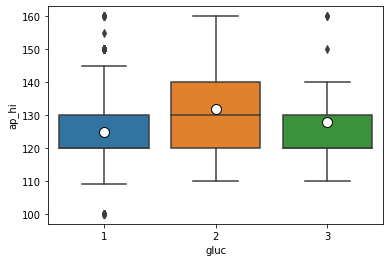

In [70]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans=True,  meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

⭐Show the descriptive statistics of 3 groups.

In [71]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,430.0,124.790698,13.097373,100.0,120.0,120.0,130.0,160.0
2,29.0,131.724138,13.645765,110.0,120.0,130.0,140.0,160.0
3,41.0,127.926829,12.697225,110.0,120.0,120.0,130.0,160.0


In [ ]:
#H0: All means are equal (mu1 = mu2 = mu3)
#H1: At least one mean is different.

⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [73]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"],
               df[df["gluc"]==2]["ap_hi"],
               df[df["gluc"]==3]["ap_hi"])

F_onewayResult(statistic=4.60546834365308, pvalue=0.010427469351629954)

In [74]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [76]:
multicomp = MultiComparison(df["ap_hi"], df["gluc"])

In [78]:
tukey = multicomp.tukeyhsd(alpha=0.05)

In [79]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   6.9334 0.0165  1.0263 12.8405   True
     1      3   3.1361 0.3093 -1.8964  8.1687  False
     2      3  -3.7973 0.4586 -11.268  3.6734  False
----------------------------------------------------


## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

In [ ]:
#H0: The two categorical variables are independent
#H1: The two categorical variables are dependent

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 68071 to 59916
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           500 non-null    int64  
 1   age          500 non-null    int64  
 2   gender       500 non-null    int64  
 3   height       500 non-null    int64  
 4   weight       500 non-null    float64
 5   ap_hi        500 non-null    int64  
 6   ap_lo        500 non-null    int64  
 7   cholesterol  500 non-null    int64  
 8   gluc         500 non-null    int64  
 9   smoke        500 non-null    int64  
 10  alco         500 non-null    int64  
 11  active       500 non-null    int64  
 12  cardio       500 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 70.9 KB


⭐Create a crosstab using Pandas.

In [83]:
ct = pd.crosstab(df.active, df.cardio)
ct

cardio,0,1
active,,
0,52,68
1,196,184


⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [85]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [86]:
print("test statistic", chi)
print("p-value", p)

test statistic 2.1615593924326975
p-value 0.1415010246518072


In [87]:
dof

1

⭐Conduct chi-square test to see if there is a relationship between cholestrol and cardio.

In [88]:
ct = pd.crosstab(df.cholesterol, df.cardio)
ct

cardio,0,1
cholesterol,,
1,211,169
2,22,45
3,15,38


In [90]:
chi, p, dof, expected = stats.chi2_contingency(ct)

In [91]:
print("test statistic", chi)
print("p-value", p)

test statistic 22.48819897142347
p-value 1.308427427722443e-05


In [92]:
#There is statistically significant relationship between cholestrol and cardio.

In [93]:
df.to_csv("cardio1.csv")